In [ ]:
'''
    Support Vector Regression (SVR) -->
    
    Support Vector Regression (SVR) is an extension of Support Vector Machines (SVM) used for regression tasks.
    It predicts continuous outcomes by finding a hyperplane (or a curve in higher dimensions) that best fits the
    data within a certain margin of tolerance.
'''

In [ ]:
'''
    Key Points -->
    
    Epsilon (ϵ)-Insensitive Tube:

    SVR introduces an epsilon-insensitive tube around the hyperplane, where predictions within this
    margin of error are considered acceptable and not penalized.
    Points outside this tube are penalized based on their distance from the boundary of the tube.
    
    Objective:

    Minimize the model complexity (flatness of the hyperplane) and the prediction error for points
    outside the ϵ-tube.
    The optimization problem tries to achieve a balance between model complexity and the tolerance to small errors.
    
    Kernel Trick:

    SVR can handle non-linear relationships by using kernels (e.g., linear, polynomial, RBF).
    Kernels allow SVR to project data into a higher-dimensional space where a linear hyperplane can better fit the data.
    
    Slack Variables (ξ,ξ*):

    These represent the amount by which data points fall outside the ϵ-tube.
    The model penalizes these deviations in the optimization process.
'''

<img src="Source/Formula.png" alt="Formula" style="width:700px; height:auto;">

In [ ]:
'''
    Steps to Use Support Vector Regression -->
    
    Choose a Kernel:

    Linear kernel: When the data is approximately linear.
    Polynomial kernel: For polynomial relationships.
    RBF kernel: For complex non-linear relationships.
    
    Set Hyperparameters:

    ϵ: Determines the margin of tolerance.
    C: Controls the trade-off between margin size and slack penalties.
    Kernel-specific parameters (e.g.,γ for RBF).
    
    Train the Model:

    Fit the model to the training data by solving the optimization problem.

    Evaluate and Predict:

    Evaluate the model's performance on a test set.
    Use the trained model for predictions.
'''

In [ ]:
'''
    When to Use SVR -->
    
    When you have non-linear relationships in your data
    When you need to balance the model's complexity and tolerance for small deviations (ϵ)
    When your dataset is not extremely large (since SVR can be computationally expensive for large datasets)
    
    Advantages -->
    
    Effective in high-dimensional spaces.
    Can handle non-linear data with kernels.
    Robust to outliers with ϵ-insensitive loss.
    
    Limitations -->
    
    Computationally expensive for large datasets.
    Requires careful tuning of hyperparameters (C,ϵ,γ).
    Can be sensitive to the choice of kernel.
'''

<img src="Source/SVR-Diff.png" alt="Formula" style="width:700px; height:auto;">

In [12]:
#   Importing Libraries -->

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
#   Importing Dataset -->

data = pd.read_csv('Data/Position_Salaries.csv')
x_data = data.iloc[:, 1:-1].values
y_data = data.iloc[:, -1].values
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
x_data

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y_data

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [ ]:
#   Stacndard Scaler requires 2D array as input so we have to convert y_data into 2D array

In [8]:
y_data = y_data.reshape(len(y_data),1)
y_data

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [9]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_data = sc_x.fit_transform(x_data)
y_data = sc_y.fit_transform(y_data)

In [10]:
x_data

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [11]:
y_data

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [13]:
model = SVR(kernel = 'rbf')
model.fit(x_data, y_data)

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [14]:
sc_y.inverse_transform(model.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

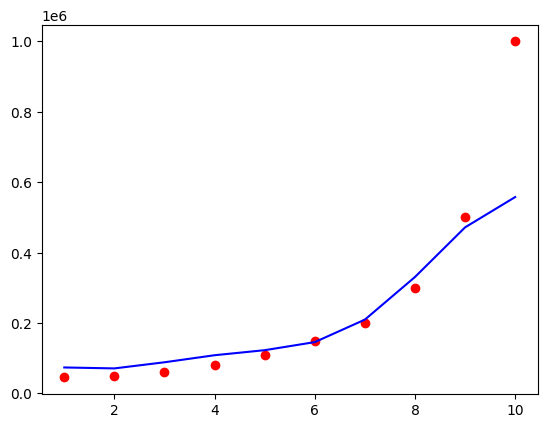

In [15]:
plt.scatter(sc_x.inverse_transform(x_data), sc_y.inverse_transform(y_data), color = 'red')
plt.plot(sc_x.inverse_transform(x_data), sc_y.inverse_transform(model.predict(x_data).reshape(-1,1)), color = 'blue')
plt.show()